loss : 4.7162, train_accuracy : 0.5300, test_accuracy : 0.5100
loss : 0.0668, train_accuracy : 0.9860, test_accuracy : 0.8750
loss : 0.0102, train_accuracy : 0.9990, test_accuracy : 0.9050
loss : 0.0062, train_accuracy : 0.9990, test_accuracy : 0.9100
loss : 0.0036, train_accuracy : 0.9995, test_accuracy : 0.8950
loss : 0.0111, train_accuracy : 0.9985, test_accuracy : 0.9050
loss : 0.0043, train_accuracy : 0.9990, test_accuracy : 0.8900
loss : 0.0022, train_accuracy : 0.9995, test_accuracy : 0.8850
loss : 0.0025, train_accuracy : 0.9995, test_accuracy : 0.8900
loss : 0.0062, train_accuracy : 0.9990, test_accuracy : 0.8850
loss : 0.0085, train_accuracy : 0.9990, test_accuracy : 0.9000
loss : 0.0076, train_accuracy : 0.9990, test_accuracy : 0.8800
loss : 0.0075, train_accuracy : 0.9990, test_accuracy : 0.9050
loss : 0.0086, train_accuracy : 0.9990, test_accuracy : 0.8800
loss : 0.0097, train_accuracy : 0.9995, test_accuracy : 0.8900
loss : 0.0033, train_accuracy : 0.9995, test_accuracy :

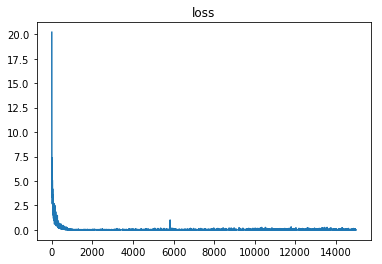

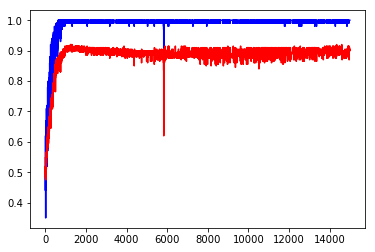

In [1]:
import tensorflow as tf
import numpy as np
import pickle
import CNN

epochs = 1000
batch_size = 128
data = pickle.load(open('mushroom.p', 'rb'))

sess = tf.Session()
dnn_model = CNN.CNN(sess = sess, input_shape=data['train_image'].shape, n_class = 2)
adam_opt = CNN.Solver(sess = sess, name = 'Adam', model = dnn_model, optimizer = tf.train.AdamOptimizer)

sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    total_batch = int(data['train_label'].shape[0] / batch_size)

    for step in range(total_batch):
        ind = np.random.randint(len(data['train_label']), size = 100)
        batch_xs, batch_ys = data['train_image'][ind], data['train_label'][ind]
        val_xs, val_ys = data['test_image'], data['test_label']

        adam_opt.train(x_data=batch_xs, y_data=batch_ys, lr=1e-4, test_x_data=val_xs, test_y_data=val_ys)

    if epoch % 50 == 0:
        adam_opt.print_information(data['train_image'], data['train_label'], data['test_image'], data['test_label'])

adam_opt.print_result()